# Incidence of influenza-like illness in France

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

The data on the incidence of influenza-like illness are available from the Web site of the [Réseau Sentinelles](http://www.sentiweb.fr/). We download them as a file in CSV format, in which each line corresponds to a week in the observation period. Only the complete dataset, starting in 1984 and ending with a recent week, is available for download.

**Observation**: We now have a local file with the data, so the following line has been commented out:

In [2]:
data_url = "http://www.sentiweb.fr/datasets/incidence-PAY-7.csv"

This is the documentation of the data from [the download site](https://ns.sentiweb.fr/incidence/csv-schema-v1.json):

| Column name  | Description                                                                                                               |
|--------------|---------------------------------------------------------------------------------------------------------------------------|
| `week`       | ISO8601 Yearweek number as numeric (year times 100 + week nubmer)                                                               |
| `indicator`  | Unique identifier of the indicator, see metadata document https://www.sentiweb.fr/meta.json                               |
| `inc`        | Estimated incidence value for the time step, in the geographic level                                                      |
| `inc_low`    | Lower bound of the estimated incidence 95% Confidence Interval                                                            |
| `inc_up`     | Upper bound of the estimated incidence 95% Confidence Interval                                                            |
| `inc100`     | Estimated rate incidence per 100,000 inhabitants                                                                          |
| `inc100_low` | Lower bound of the estimated incidence 95% Confidence Interval                                                            |
| `inc100_up`  | Upper bound of the estimated rate incidence 95% Confidence Interval                                                       |
| `geo_insee`  | Identifier of the geographic area, from INSEE https://www.insee.fr                                                        |
| `geo_name`   | Geographic label of the area, corresponding to INSEE code. This label is not an id and is only provided for human reading |

The first line of the CSV file is a comment, which we ignore with `skip=1`.

**Observation**: We modified and now we read the data from the file *raw_data.csv*:

In [3]:
raw_data = pd.read_csv(data_url, encoding = 'iso-8859-1', skiprows=1)
raw_data

# raw_data = pd.read_csv("raw_data.csv", index_col=0)
# raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202137          7   2317      669    3965       4           2   
1     202136          7   3565     1748    5382       5           2   
2     202135          7   2562     1107    4017       4           2   
3     202134          7   1429      378    2480       2           0   
4     202133          7   3829     1830    5828       6           3   
5     202132          7   4108     1895    6321       6           3   
6     202131          7   4793     2301    7285       7           3   
7     202130          7   7190     4191   10189      11           6   
8     202129          7   6800     4109    9491      10           6   
9     202128          7   9734        0   21731      15           0   
10    202127          7   9026     4316   13736      14           7   
11    202126          7   7284     4108   10460      11           6   
12    202125          7   9351     6540   12162      14          10   
13    202124          7  12034     8937   15131      18          13   
14    202123          7   9116     6420   11812      14          10   
15    202122          7   4817     2752    6882       7           4   
16    202121          7   6092     3458    8726       9           5   
17    202120          7   7485     4601   10369      11           7   
18    202119          7   6654     4370    8938      10           7   
19    202118          7   3912     2110    5714       6           3   
20    202117          7   4686     2878    6494       7           4   
21    202116          7   4780     2891    6669       7           4   
22    202115          7  11215     7627   14803      17          12   
23    202114          7  11197     7994   14400      17          12   
24    202113          7   9714     6289   13139      15          10   
25    202112          7  11520     8415   14625      17          12   
26    202111          7   9386     6678   12094      14          10   
27    202110          7   9056     6452   11660      14          10   
28    202109          7  10988     7938   14038      17          12   
29    202108          7  11281     8361   14201      17          13   
...      ...        ...    ...      ...     ...     ...         ...   
1577  199126          7  17608    11304   23912      31          20   
1578  199125          7  16169    10700   21638      28          18   
1579  199124          7  16171    10071   22271      28          17   
1580  199123          7  11947     7671   16223      21          13   
1581  199122          7  15452     9953   20951      27          17   
1582  199121          7  14903     8975   20831      26          16   
1583  199120          7  19053    12742   25364      34          23   
1584  199119          7  16739    11246   22232      29          19   
1585  199118          7  21385    13882   28888      38          25   
1586  199117          7  13462     8877   18047      24          16   
1587  199116          7  14857    10068   19646      26          18   
1588  199115          7  13975     9781   18169      25          18   
1589  199114          7  12265     7684   16846      22          14   
1590  199113          7   9567     6041   13093      17          11   
1591  199112          7  10864     7331   14397      19          13   
1592  199111          7  15574    11184   19964      27          19   
1593  199110          7  16643    11372   21914      29          20   
1594  199109          7  13741     8780   18702      24          15   
1595  199108          7  13289     8813   17765      23          15   
1596  199107          7  12337     8077   16597      22          15   
1597  199106          7  10877     7013   14741      19          12   
1598  199105          7  10442     6544   14340      18          11   
1599  199104          7   7913     4563   11263      14           8   
1600  199103          7  15387    10484   20290      27          18   
1601  199102          7  16277  

Are there missing data points? Yes, week 19 of year 1989 does not have any observed values.

In [4]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

We delete this point, which does not have big consequence for our rather simple analysis.

In [5]:
# data = raw_data.dropna().copy()
data = raw_data

Our dataset uses an uncommon encoding; the week number is attached
to the year number, leaving the impression of a six-digit integer.
That is how Pandas interprets it.

A second problem is that Pandas does not know about week numbers.
It needs to be given the dates of the beginning and end of the week.
We use the library `isoweek` for that.

Since the conversion is a bit lengthy, we write a small Python 
function for doing it. Then we apply it to all points in our dataset. 
The results go into a new column 'period'.

In [6]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

There are two more small changes to make.

First, we define the observation periods as the new index of
our dataset. That turns it into a time series, which will be
convenient later on.

Second, we sort the points chronologically.

In [7]:
sorted_data = data.set_index('period').sort_index()

We check the consistency of the data. Between the end of a period and
the beginning of the next one, the difference should be zero, or very small.
We tolerate an error of one second.

This is OK except for one pair of consecutive periods between which
a whole week is missing.

We recognize the dates: it's the week without observations that we
have deleted earlier!

In [8]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

A first look at the data!

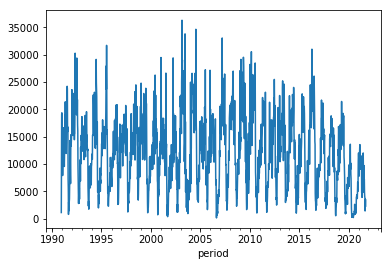

In [9]:
sorted_data['inc'].plot()

A zoom on the last few years shows more clearly that the peaks are situated in winter.

In [ ]:
sorted_data['inc'][-200:].plot()

## Study of the annual incidence

Since the peaks of the epidemic happen in winter, near the transition
between calendar years, we define the reference period for the annual
incidence from August 1st of year $N$ to August 1st of year $N+1$. We
label this period as year $N+1$ because the peak is always located in
year $N+1$. The very low incidence in summer ensures that the arbitrariness
of the choice of reference period has no impact on our conclusions.

Our task is a bit complicated by the fact that a year does not have an
integer number of weeks. Therefore we modify our reference period a bit:
instead of August 1st, we use the first day of the week containing August 1st.

A final detail: the dataset starts in October 1984, the first peak is thus
incomplete, We start the analysis with the first full peak.

In [ ]:
first_august_week = [pd.Period(pd.Timestamp(y, 8, 1), 'W')
                     for y in range(1985,
                                    sorted_data.index[-1].year)]

Starting from this list of weeks that contain August 1st, we obtain intervals of approximately one year as the periods between two adjacent weeks in this list. We compute the sums of weekly incidences for all these periods.

We also check that our periods contain between 51 and 52 weeks, as a safeguard against potential mistakes in our code.

In [ ]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_august_week[:-1],
                        first_august_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

And here are the annual incidences.

In [ ]:
yearly_incidence.plot(style='*')

A sorted list makes it easier to find the highest values (at the end).

In [ ]:
yearly_incidence.sort_values()

Finally, a histogram clearly shows the few very strong epidemics, which affect about 10% of the French population,
but are rare: there were three of them in the course of 35 years. The typical epidemic affects only half as many people.

In [ ]:
yearly_incidence.hist(xrot=20)